In [1]:
#Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import joblib
import os

# Cargar dataset
df = pd.read_csv("datasets/comprar_alquilar.csv")
#leer los primeros registros
df.head()


,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
0,6000,1000,0,600,50000,400000,0,2,2,1
1,6745,944,123,429,43240,636897,1,3,6,0
2,6455,1033,98,795,57463,321779,2,1,8,1
3,7098,1278,15,254,54506,660933,0,0,3,0
4,6167,863,223,520,41512,348932,0,0,3,1


In [2]:
#Inspección y selección de variables
# Información básica
print("Shape:", df.shape)
display(df.info())
display(df.describe().T)

# Seleccion de columnas numéricas 
cols_num = df.select_dtypes(include=[np.number]).columns.tolist()
print("Columnas numéricas encontradas:", cols_num)


if 'comprar' in cols_num:
    X = df.drop(columns=['comprar']).select_dtypes(include=[np.number])
    y = df['comprar']
else:
    X = df.select_dtypes(include=[np.number])
    y = None

X.shape, X.columns.tolist()


Shape: (202, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ingresos        202 non-null    int64
 1   gastos_comunes  202 non-null    int64
 2   pago_coche      202 non-null    int64
 3   gastos_otros    202 non-null    int64
 4   ahorros         202 non-null    int64
 5   vivienda        202 non-null    int64
 6   estado_civil    202 non-null    int64
 7   hijos           202 non-null    int64
 8   trabajo         202 non-null    int64
 9   comprar         202 non-null    int64
dtypes: int64(10)
memory usage: 15.9 KB


None

,count,mean,std,min,25%,50%,75%,max
ingresos,202.0,4958.995050,1682.862556,2008.0,3513.75,4947.5,6374.50,7984.0
gastos_comunes,202.0,971.584158,272.106351,384.0,766.75,968.0,1165.25,1585.0
pago_coche,202.0,211.742574,124.940754,0.0,99.00,208.5,318.75,448.0
gastos_otros,202.0,515.425743,168.103075,201.0,383.25,522.5,656.75,828.0
ahorros,202.0,38749.668317,17365.231870,10319.0,24964.25,38523.0,52150.75,69934.0
vivienda,202.0,373349.638614,136371.525622,176553.0,274810.00,340783.5,444482.00,669540.0
estado_civil,202.0,1.024752,0.837184,0.0,0.00,1.0,2.00,2.0
hijos,202.0,1.232673,1.367833,0.0,0.00,1.0,2.00,4.0
trabajo,202.0,4.490099,2.535794,0.0,2.00,5.0,7.00,8.0
comprar,202.0,0.331683,0.471988,0.0,0.00,0.0,1.00,1.0


Columnas numéricas encontradas: ['ingresos', 'gastos_comunes', 'pago_coche', 'gastos_otros', 'ahorros', 'vivienda', 'estado_civil', 'hijos', 'trabajo', 'comprar']


((202, 9),
 ['ingresos',
  'gastos_comunes',
  'pago_coche',
  'gastos_otros',
  'ahorros',
  'vivienda',
  'estado_civil',
  'hijos',
  'trabajo'])

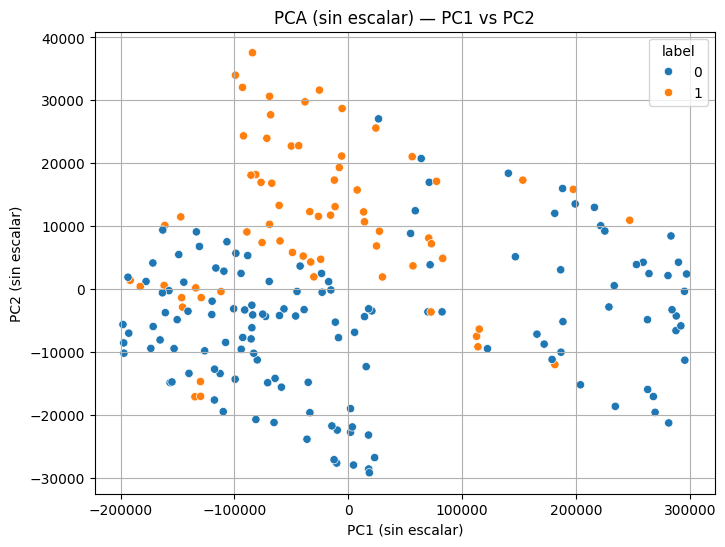

In [3]:
#PCA sin escalamiento
# PCA sin escalar
pca_no_scale = PCA(n_components=2)  # sólo para visualizar primeras 2 comp.
X_no_scale = X.values.copy()
pca_coords_no_scale = pca_no_scale.fit_transform(X_no_scale)

# DataFrame con coordenadas
df_pca_ns = pd.DataFrame(pca_coords_no_scale, columns=['PC1_no_scale','PC2_no_scale'])
if y is not None:
    df_pca_ns['label'] = y.values

# Gráfica PC1 vs PC2 sin escalar
plt.figure(figsize=(8,6))
if y is not None:
    sns.scatterplot(x='PC1_no_scale', y='PC2_no_scale', hue='label', palette='tab10', data=df_pca_ns)
else:
    plt.scatter(df_pca_ns['PC1_no_scale'], df_pca_ns['PC2_no_scale'])
plt.title('PCA (sin escalar) — PC1 vs PC2')
plt.xlabel('PC1 (sin escalar)')
plt.ylabel('PC2 (sin escalar)')
plt.grid(True)
plt.show()


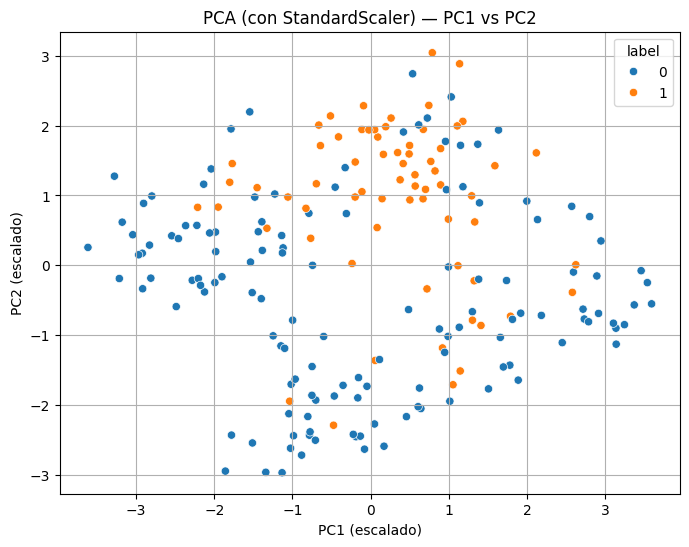

In [4]:
# Escalado + PCA
# Estandarizaracion
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA sobre datos escalados
pca = PCA(n_components=2)
pca_coords = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame(pca_coords, columns=['PC1_scaled','PC2_scaled'])
if y is not None:
    df_pca['label'] = y.values

plt.figure(figsize=(8,6))
if y is not None:
    sns.scatterplot(x='PC1_scaled', y='PC2_scaled', hue='label', palette='tab10', data=df_pca)
else:
    plt.scatter(df_pca['PC1_scaled'], df_pca['PC2_scaled'])
plt.title('PCA (con StandardScaler) — PC1 vs PC2')
plt.xlabel('PC1 (escalado)')
plt.ylabel('PC2 (escalado)')
plt.grid(True)
plt.show()


,PC,ExplainedVarianceRatio,CumExplained
0,1,0.299136,0.299136
1,2,0.232949,0.532085
2,3,0.117112,0.649197
3,4,0.106856,0.756053
4,5,0.096353,0.852406
5,6,0.056299,0.908705
6,7,0.041456,0.950161
7,8,0.030178,0.980339
8,9,0.019661,1.000000


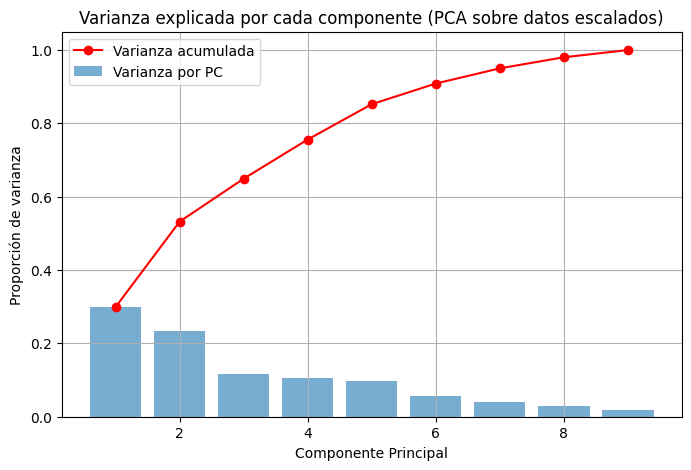

Número de componentes que explican >= 90% varianza: 6


In [5]:
#Varianza explicada y criterio para elegir el nuemero de componentes
# Calculamos PCA completo para ver varianza explicada
pca_full = PCA().fit(X_scaled)  # usar datos escalados para criterio robusto
explained = pca_full.explained_variance_ratio_
cum_explained = np.cumsum(explained)

# Mostrar los primeros 15 o todos si pocos
ev_df = pd.DataFrame({
    'PC': np.arange(1, len(explained)+1),
    'ExplainedVarianceRatio': explained,
    'CumExplained': cum_explained
})
display(ev_df.head(15))

# Gráfica de varianza explicada y acumulada
plt.figure(figsize=(8,5))
plt.bar(ev_df['PC'], ev_df['ExplainedVarianceRatio'], alpha=0.6, label='Varianza por PC')
plt.plot(ev_df['PC'], ev_df['CumExplained'], marker='o', color='red', label='Varianza acumulada')
plt.xlabel('Componente Principal')
plt.ylabel('Proporción de varianza')
plt.title('Varianza explicada por cada componente (PCA sobre datos escalados)')
plt.legend()
plt.grid(True)
plt.show()

# Selección automática: elegir mínimo n_components con CumExplained >= 0.90 (90%)
threshold = 0.90
n_components_selected = np.argmax(cum_explained >= threshold) + 1  # +1 por índice
print(f"Número de componentes que explican >= {threshold*100:.0f}% varianza: {n_components_selected}")


In [6]:
#Ejecutar PCA con el número de componentes elegido y guardar el modelo
n_comp = n_components_selected  # el criterio automático anterior (ej: 2,3,...)
pca_final = PCA(n_components=n_comp)
X_reduced = pca_final.fit_transform(X_scaled)

print("Forma del dataset reducido:", X_reduced.shape)

# Guardar scaler + pca en un pipeline simple
os.makedirs("resultados", exist_ok=True)
joblib.dump(scaler, "resultados/scaler_comprar_alquilar.joblib")
joblib.dump(pca_final, "resultados/pca_comprar_alquilar.joblib")

# Guardar dataframe reducido para análisis / visualización
df_reduced = pd.DataFrame(X_reduced, columns=[f'PC{i+1}' for i in range(n_comp)])
if y is not None:
    df_reduced['comprar'] = y.values
df_reduced.to_csv("resultados/comprar_alquilar_reducido.csv", index=False)

print("Modelos y dataset reducido guardados en carpeta 'resultados/'")


Forma del dataset reducido: (202, 6)
Modelos y dataset reducido guardados en carpeta 'resultados/'
